<a href="https://colab.research.google.com/github/Sinudeshmukh/Data-Science/blob/main/EmotionMiningAssgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import spacy
from wordcloud import WordCloud

In [ ]:
reviews = pd.read_csv('Iphone12Reviews.txt',error_bad_lines=False,sep=',',encoding='cp1252')

b'Skipping line 4: expected 1 fields, saw 2\nSkipping line 10: expected 1 fields, saw 3\nSkipping line 12: expected 1 fields, saw 5\nSkipping line 13: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 4\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 21: expected 1 fields, saw 2\nSkipping line 23: expected 1 fields, saw 3\nSkipping line 24: expected 1 fields, saw 2\nSkipping line 26: expected 1 fields, saw 2\nSkipping line 27: expected 1 fields, saw 8\nSkipping line 28: expected 1 fields, saw 2\nSkipping line 30: expected 1 fields, saw 2\nSkipping line 32: expected 1 fields, saw 2\nSkipping line 34: expected 1 fields, saw 2\nSkipping line 35: expected 1 fields, saw 3\nSkipping line 39: expected 1 fields, saw 2\nSkipping line 40: expected 1 fields, saw 2\nSkipping line 41: expected 1 fields, saw 2\nSkipping line 42: expected 1 fields, saw 2\nSkipping line 57: expected 1 fields, saw 3\nSkipping line 62: expected 1 fields, saw 2\nSkipping line 63: expected 1 fi

##These are latest reviews of IPhone 12 Pro Max Collected from Amazon

In [ ]:
reviews

,x
0,Discount offered by the seller is great... dis...
1,The best phone I have used . This is my first ...
2,worst phone ever even nokia is better than thi...
3,IPhone 12 Pro max is looking so Beautiful
4,I love this phone...my dream phone....one day ...
5,Good phone nice price and battery life is good...
6,Nice product. But charger should be there.
7,Not recommended. It is a waste of money. Be lo...
8,Cons: Running out of Kidneys to sell to buy iP...
9,Make sure to get a decent Screen guard and cle...


##Data Cleaning

In [ ]:
import re  #regular expression
import string

In [ ]:
def clean_data(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]','', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_data(x)

In [ ]:
reviews['x'] = reviews.x.apply(clean)

In [ ]:
reviews['x']

0     discount offered by the seller is great discou...
1     the best phone i have used  this is my first i...
2     worst phone ever even nokia is better than thi...
3               iphone  pro max is looking so beautiful
4     i love this phonemy dream phoneone day i buy t...
5     good phone nice price and battery life is good...
6              nice product but charger should be there
7     not recommended it is a waste of money be logi...
8     cons running out of kidneys to sell to buy iph...
9     make sure to get a decent screen guard and cle...
10    had pre booked this iphone  pro max amazon del...
11    build quality is significantly improved this d...
12    the phone does feels premium when one holds it...
13    i fell like the phone is bit expensive then it...
14    the phone crashed within  days of purchase and...
15    highly recommended business phone security and...
16    enough has been said already about this phone ...
17    that  of people who are going to buy this 

In [ ]:
reviews1 = reviews.copy()

###Remove Spaces and empty strings

In [ ]:
#remove both the leading and the trailing characters
reviews = [x.strip() for x in reviews.x]

In [ ]:
# removes empty strings
reviews = [x for x in reviews if x]

In [ ]:
reviews[0:10]

['discount offered by the seller is great discount offered by the seller is great',
 'the best phone i have used  this is my first iphone and i never liked iphone  but after getting frustrated with battery life multiple androids  i decided to bit the dust and pay money to buy quality phone  and now that i own it  i dont regret it at all  two days battery with  to  hours on screen time  if used moderately',
 'worst phone ever even nokia is better than this  very bad quality does not even start  dont buy',
 'iphone  pro max is looking so beautiful',
 'i love this phonemy dream phoneone day i buy this phonethis phone is fabulous outstanding phone i need this phone',
 'good phone nice price and battery life is good nice quality device and nice ios quality good performance and good features',
 'nice product but charger should be there',
 'not recommended it is a waste of money be logical enough to make a call on this',
 'cons running out of kidneys to sell to buy iphones in india',
 'make s

In [ ]:
#Joining the list into one string
allreviews = ' '.join(reviews)
allreviews

'discount offered by the seller is great discount offered by the seller is great the best phone i have used  this is my first iphone and i never liked iphone  but after getting frustrated with battery life multiple androids  i decided to bit the dust and pay money to buy quality phone  and now that i own it  i dont regret it at all  two days battery with  to  hours on screen time  if used moderately worst phone ever even nokia is better than this  very bad quality does not even start  dont buy iphone  pro max is looking so beautiful i love this phonemy dream phoneone day i buy this phonethis phone is fabulous outstanding phone i need this phone good phone nice price and battery life is good nice quality device and nice ios quality good performance and good features nice product but charger should be there not recommended it is a waste of money be logical enough to make a call on this cons running out of kidneys to sell to buy iphones in india make sure to get a decent screen guard and 

###Part of Speech Tagging

In [ ]:
nlp = spacy.load('en_core_web_sm')

allreviews1 = nlp(allreviews)
spacy.displacy.render(allreviews1,style='ent',jupyter=True)

In [ ]:
#tokenization
for token in allreviews1[0:50]:
  print(token,token.pos_)

discount NOUN
offered VERB
by ADP
the DET
seller NOUN
is AUX
great ADJ
discount NOUN
offered VERB
by ADP
the DET
seller NOUN
is AUX
great ADJ
the DET
best ADJ
phone NOUN
i PRON
have AUX
used VERB
  SPACE
this DET
is AUX
my DET
first ADJ
iphone NOUN
and CCONJ
i PRON
never ADV
liked VERB
iphone PROPN
  SPACE
but CCONJ
after ADP
getting VERB
frustrated VERB
with ADP
battery NOUN
life NOUN
multiple ADJ
androids VERB
  SPACE
i PRON
decided VERB
to PART
bit VERB
the DET
dust NOUN
and CCONJ
pay VERB


In [ ]:
#Filtering for nouns and verbs only
noun_vrbs = [token.text for token in allreviews1 if token.pos_ in ('NOUN','VERB')]
print(noun_vrbs[0:20])

['discount', 'offered', 'seller', 'discount', 'offered', 'seller', 'phone', 'used', 'iphone', 'liked', 'getting', 'frustrated', 'battery', 'life', 'androids', 'decided', 'bit', 'dust', 'pay', 'money']


###Counting Tokens

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(noun_vrbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,phone,29
1,battery,10
2,quality,9
3,iphone,8
4,life,6
5,buy,6
6,screen,6
7,time,6
8,used,5
9,camera,5


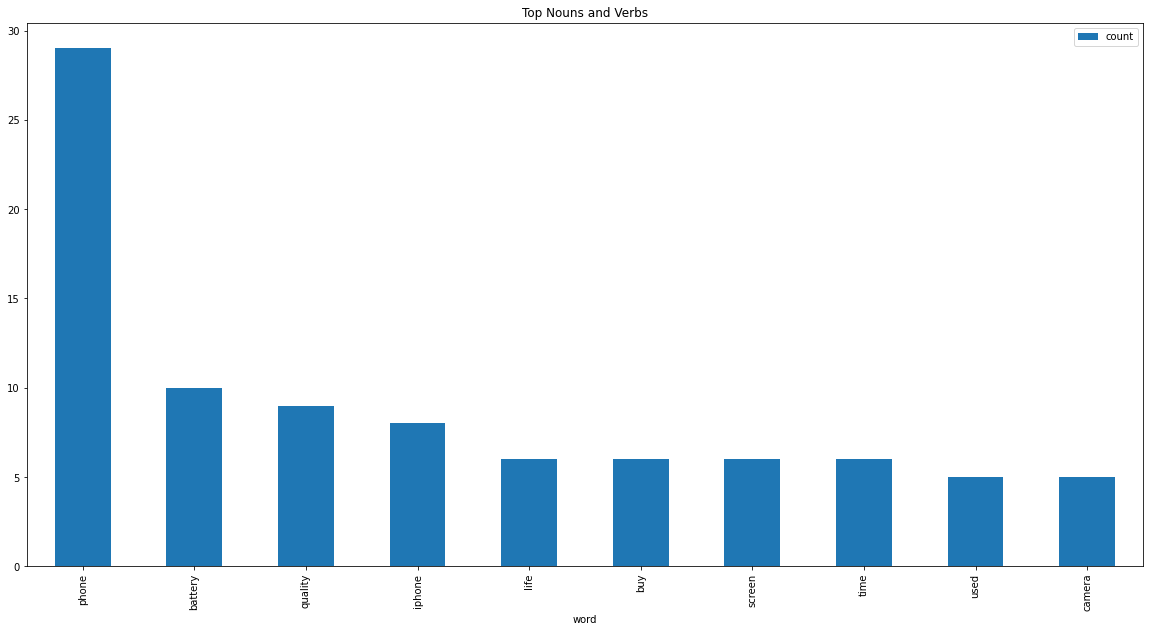

In [ ]:
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(20,10), title='Top Nouns and Verbs')

#Emotion Mining

In [ ]:
afinn = pd.read_csv('Afinn.csv',sep=',',encoding='cp1252')

In [ ]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(" ".join(reviews))

In [ ]:
sentence[0:10]

['discount offered by the seller is great discount offered by the seller is great the best phone i have used  this is my first iphone and i never liked iphone  but after getting frustrated with battery life multiple androids  i decided to bit the dust and pay money to buy quality phone  and now that i own it  i dont regret it at all  two days battery with  to  hours on screen time  if used moderately worst phone ever even nokia is better than this  very bad quality does not even start  dont buy iphone  pro max is looking so beautiful i love this phonemy dream phoneone day i buy this phonethis phone is fabulous outstanding phone i need this phone good phone nice price and battery life is good nice quality device and nice ios quality good performance and good features nice product but charger should be there not recommended it is a waste of money be logical enough to make a call on this cons running out of kidneys to sell to buy iphones in india make sure to get a decent screen guard and

In [ ]:
reviews1

,x
0,discount offered by the seller is great discou...
1,the best phone i have used this is my first i...
2,worst phone ever even nokia is better than thi...
3,iphone pro max is looking so beautiful
4,i love this phonemy dream phoneone day i buy t...
5,good phone nice price and battery life is good...
6,nice product but charger should be there
7,not recommended it is a waste of money be logi...
8,cons running out of kidneys to sell to buy iph...
9,make sure to get a decent screen guard and cle...


In [ ]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [ ]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [ ]:
reviews1['Sentiment_score'] = reviews1['x'].apply(calculate_sentiment)

In [ ]:
reviews1

,x,Sentiment_score
0,discount offered by the seller is great discou...,6
1,the best phone i have used this is my first i...,0
2,worst phone ever even nokia is better than thi...,-6
3,iphone pro max is looking so beautiful,3
4,i love this phonemy dream phoneone day i buy t...,13
5,good phone nice price and battery life is good...,21
6,nice product but charger should be there,3
7,not recommended it is a waste of money be logi...,1
8,cons running out of kidneys to sell to buy iph...,0
9,make sure to get a decent screen guard and cle...,1


##Highly Rated Reviews

In [ ]:
reviews1.sort_values(by='Sentiment_score').tail(10)

,x,Sentiment_score
24,i have upgraded from iphone x theres nothing m...,5
37,extremely ultimate product from apple feeling...,6
40,the charm of iphone to its fullest camera is g...,6
0,discount offered by the seller is great discou...,6
43,wonderful phone but very expensive and an abso...,8
11,build quality is significantly improved this d...,10
21,amazing machine beautiful new design if you ca...,10
4,i love this phonemy dream phoneone day i buy t...,13
13,i fell like the phone is bit expensive then it...,17
5,good phone nice price and battery life is good...,21


##Low Rated Reviews

In [ ]:
reviews1.sort_values(by='Sentiment_score').head(10)

,x,Sentiment_score
2,worst phone ever even nokia is better than thi...,-6
14,the phone crashed within days of purchase and...,-5
38,you wont regret buying this phone,-2
42,a biggie which cant be forgotten,-1
26,the best phone i have used this is my first i...,0
1,the best phone i have used this is my first i...,0
23,the simplest review,0
39,really beast really value for money battery,0
31,what a grt phone superfast speed camera qualit...,0
8,cons running out of kidneys to sell to buy iph...,0


##Sentiment Scores Description of All Scores

In [ ]:
reviews1['Sentiment_score'].describe()

count    46.000000
mean      3.130435
std       4.879019
min      -6.000000
25%       0.000000
50%       3.000000
75%       3.750000
max      21.000000
Name: Sentiment_score, dtype: float64

#Best Rated Reviews

In [ ]:
reviews1[reviews1['Sentiment_score'] >=10]

,x,Sentiment_score
4,i love this phonemy dream phoneone day i buy t...,13
5,good phone nice price and battery life is good...,21
11,build quality is significantly improved this d...,10
13,i fell like the phone is bit expensive then it...,17
21,amazing machine beautiful new design if you ca...,10


##Worst Rated Reviews

In [ ]:
reviews1[reviews1['Sentiment_score']<0]

,x,Sentiment_score
2,worst phone ever even nokia is better than thi...,-6
14,the phone crashed within days of purchase and...,-5
38,you wont regret buying this phone,-2
42,a biggie which cant be forgotten,-1


##Visualization on Sentiment value

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


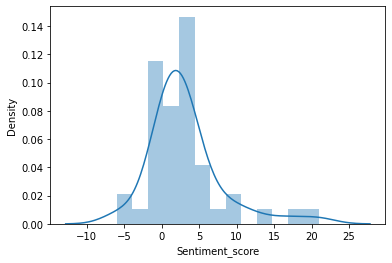

In [ ]:
sns.distplot(reviews1['Sentiment_score'])

##We can see from Visualizations that most of reviews are rated good

In [ ]:
reviews1['index'] = range(0,len(reviews1))

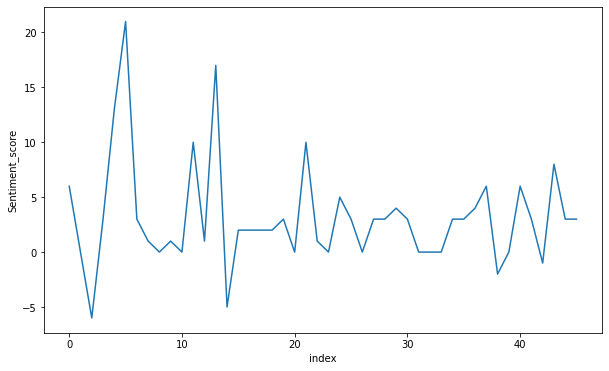

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(y='Sentiment_score',x='index',data=reviews1)

####We can see from visualization that most of reviews are Positively rated hence product is good Product

##Sentiment Value to Word Count

In [ ]:
reviews1['word_count'] = reviews1['x'].str.split().apply(len)

In [ ]:
reviews1['word_count'].head()

0    14
1    62
2    18
3     7
4    20
Name: word_count, dtype: int64

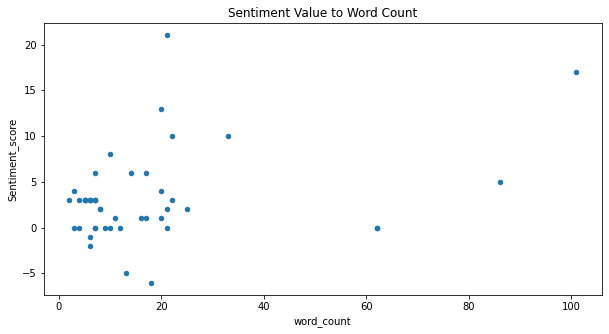

In [ ]:
reviews1.plot.scatter(x='word_count',y='Sentiment_score',figsize=(10,5),title='Sentiment Value to Word Count')

###We can see that there is no specific relation between words in reviews and sentiment score of review

##WordCloud

In [ ]:
string_total= " ".join(reviews)

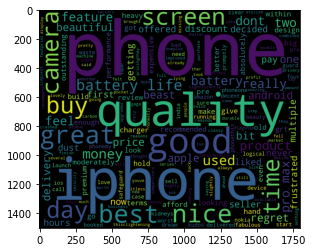

In [ ]:
#wordcloud for entire corpus
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_total)
plt.imshow(wordcloud_stw)